<a href="https://colab.research.google.com/github/riinndescartes/Machine-Learning/blob/main/Pt1_Praktikum_Decision_Tree_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Catherine V. Pang
NRP, Kelas: 2C2220008, V/A Sains Data

MK Machine Learning Praktikum Pt (1) Decision Tree Kasus Diabetes

Sumber Materi: https://scikit-learn.org/1.5/modules/tree.html

**1. Persiapan Lingkungan Kerja**

Jalankan perintah berikut untuk mengimpor library yang dibutuhkan:

In [1]:
# Import library dasar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**2. Memuat Dataset**

Dataset diabetes yang kamu unggah akan digunakan dalam latihan ini. Berikut kode untuk memuat dan melihat sekilas data:

In [4]:
# Memuat dataset
data = pd.read_csv('diabetes.csv')

# Menampilkan 5 baris pertama dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**3. Exploratory Data Analysis (EDA)**

Lakukan analisis awal untuk memahami struktur dataset dan memeriksa data yang hilang:

In [5]:
# Menampilkan informasi dataset
print(data.info())

# Melihat statistik deskriptif dataset
print(data.describe())

# Memeriksa jumlah nilai kosong di setiap kolom
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

**4. Memisahkan Fitur dan Label**

Pisahkan fitur dan label, serta lakukan pembagian data training dan testing:

In [6]:
# Pisahkan fitur (X) dan label (y)
X = data.drop('Outcome', axis=1)  # Fitur
y = data['Outcome']               # Label

# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**5. Membangun Model Decision Tree**

Gunakan DecisionTreeClassifier dari Scikit-Learn untuk membangun model:

In [7]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**6. Evaluasi Model**

Setelah model dilatih, lakukan prediksi dan evaluasi hasilnya:

In [8]:
# Melakukan prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi menggunakan confusion matrix dan accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[75 24]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Accuracy Score: 0.75


**7. Visualisasi Decision Tree**

Struktur Decision Tree yang terbentuk:

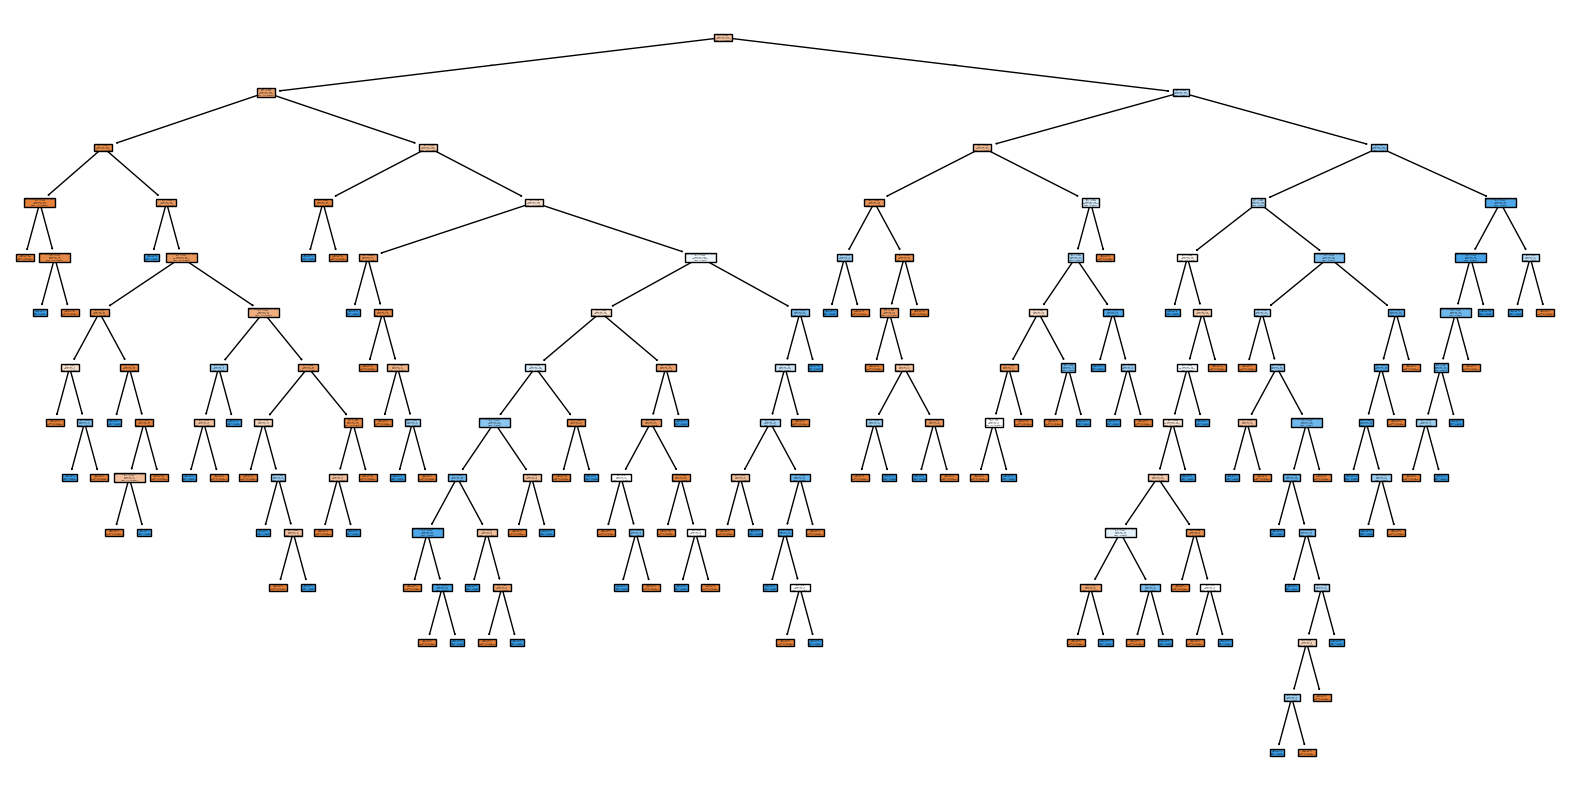

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()


**8. Interpretasi Hasil**

Confusion Matrix: Memberikan insight mengenai jumlah prediksi benar dan salah untuk setiap kelas.

Accuracy Score: Proporsi prediksi benar terhadap seluruh prediksi.

Classification Report: Menyediakan metrik tambahan seperti precision, recall, dan F1-score.


**Dari hasil di atas diperoleh:**

**1. Confusion Matrix:**

[[75 24]

 [15 40]]

Artinya:

- 75: True Negative (Kelas 0 sebanyak 75 data diprediksi benar sebagai 0).

- 24: False Positive (Kelas 0 sebanyak 24 data diprediksi sebagai 1, namun seharusnya 0).

- 15: False Negative (Kelas 1 sebanyak 15 data diprediksi sebagai 0, namun seharusnya 1).

- 40: True Positive (Kelas 1 sebanyak 40 data diprediksi benar sebagai 1).

**Insight**:

Model berhasil memprediksi 75 kasus dari kelas 0 dan 40 kasus dari kelas 1 dengan benar. Namun, terdapat 24 kesalahan di mana kelas 0 diprediksi sebagai kelas 1, dan 15 kesalahan di mana kelas 1 diprediksi sebagai kelas 0.


**2. Classification Report:**

Classification report memberikan metrik penting untuk setiap kelas, yaitu precision, recall, dan F1-score.

Kelas 0 (Non-Diabetes):

*   Precision: 0.83 – Dari semua prediksi kelas 83% di antaranya benar.
*   Recall: 0.76 – Dari seluruh sampel kelas 76% terdeteksi dengan benar.
*   F1-score: 0.79 – Rata-rata harmonis dari precision dan recall untuk kelas 0.

Kelas 1 (Diabetes):

*   Precision: 0.62 – Dari semua prediksi kelas 1, sebanyak 62% di antaranya benar.
*   Recall: 0.73 – Dari seluruh sampel kelas 1, sebanyak 73% terdeteksi dengan benar.
*  F1-score: 0.67 – Rata-rata harmonis dari precision dan recall untuk kelas 1.

**3. Accuracy Score:**

Accuracy: 0.75

Artinya, model ini memiliki akurasi 75%, atau 75% dari seluruh prediksi model adalah benar.

**Analisis dan Kesimpulan:**

- Kelas 0 memiliki precision yang lebih tinggi (0.83) dibandingkan kelas 1 (0.62). Artinya, model lebih baik dalam mengidentifikasi kelas 0 dibandingkan kelas 1.

- Recall kelas 1 (0.73) menunjukkan bahwa model cukup baik dalam mendeteksi sampel kelas 1, meskipun ada beberapa yang salah terdeteksi sebagai kelas 0.

- F1-score untuk kelas 1 lebih rendah (0.67) dibandingkan kelas 0 (0.79), menunjukkan bahwa keseimbangan antara precision dan recall untuk kelas 1 kurang optimal.

# Langkah-Langkah Tugas



### Bagian 1: Eksperimen dengan Hyperparameter Tuning

**1. Modifikasi Hyperparameter:**

Ubah nilai `max_depth` dan `min_samples_split` untuk melihat dampaknya pada performa model.



Gunakan kombinasi berikut:

`max_depth` = 3, `min_samples_split` = 5

`max_depth` = 5, `min_samples_split` = 10

`max_depth` = None, `min_samples_split` = 2

**2. Koding:**

Implementasikan perubahan tersebut dan cetak accuracy score untuk setiap kombinasi parameter.

In [10]:
params = [(3, 5), (5, 10), (None, 2)]

for max_depth, min_samples_split in params:
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"max_depth={max_depth}, min_samples_split={min_samples_split} -> Accuracy: {accuracy:.2f}")


max_depth=3, min_samples_split=5 -> Accuracy: 0.76
max_depth=5, min_samples_split=10 -> Accuracy: 0.79
max_depth=None, min_samples_split=2 -> Accuracy: 0.75


**3. Pertanyaan:**

a. Dari kombinasi parameter di atas, mana yang menghasilkan akurasi terbaik?

Berdasarkan hasil Max Depth 3 minimal sample split 5 didapatkan akurasi 76%, Max Depth 5 minimal sample split 10 didapatkan akurasi 79% dan Max Depth None minimal sample split 2 didapatkan akurasi 75%. Maka dapat dilihat kombinasi parameter dengan akurasi terbaik adalah Max Depth 5 dan Minimal Sample Splitnya 10. Kombinasi parameter tersebut menghasilkan nilai akurasi paling tinggi dibandingkan kombinasi parameter lainnya yaitu dengan nilai 79%.

b. Mengapa kombinasi tertentu lebih baik dibandingkan yang lain?

1. **Keseimbangan antara kompleksitas dan generalisasi:**
   - **Max Depth 5** memberikan kedalaman pohon yang cukup untuk menangkap pola penting dalam data tanpa menjadi terlalu kompleks. Kedalaman yang lebih dalam memungkinkan pohon untuk membuat lebih banyak keputusan yang memisahkan data secara lebih spesifik, namun jika terlalu dalam, pohon bisa menjadi terlalu sensitif terhadap data pelatihan (overfitting). Dengan kedalaman maksimal 5, pohon masih mampu mempelajari data dengan baik tanpa berlebihan.
   
2. **Minimal Sample Split 10:**
   - Minimal Sample Split menentukan jumlah minimum sampel yang diperlukan untuk memecah sebuah node. Nilai yang lebih tinggi (10 dalam kasus ini) mencegah pohon memecah node jika jumlah sampel di node tersebut terlalu kecil, yang bisa mengarah pada overfitting jika sampel terlalu sedikit. Kombinasi ini membantu menjaga pohon tetap sederhana dan menghindari pembelahan yang tidak diperlukan pada node dengan data kecil yang tidak signifikan.

3. **Kombinasi parameter lain (Max Depth 3 dan None):**
   - **Max Depth 3** mungkin terlalu dangkal, yang bisa mengakibatkan model gagal menangkap semua pola penting dalam data, sehingga menghasilkan akurasi yang lebih rendah (76%).
   - **Max Depth None** tidak membatasi kedalaman pohon, yang bisa menyebabkan overfitting karena pohon mungkin terlalu dalam dan mempelajari noise dari data, sehingga performanya menurun pada data yang belum pernah dilihat (akurasi 75%).

Dengan kata lain, kombinasi Max Depth 5 dan Minimal Sample Split 10 memungkinkan pohon keputusan untuk mempelajari pola yang cukup detail tanpa terlalu kompleks, sehingga memberikan **generalization** yang lebih baik dan menghasilkan akurasi tertinggi di antara kombinasi parameter lainnya.

### Bagian 2: Analisis Feature Importance

**1. Feature Importance:**

Identifikasi fitur mana yang paling mempengaruhi keputusan model. Menggunakan kode berikut untuk melihat feature importance:

In [11]:
# Mendapatkan importance dari setiap fitur
importances = model.feature_importances_

# Membuat DataFrame untuk menampilkan importance setiap fitur
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
1                   Glucose    0.314225
5                       BMI    0.170700
2             BloodPressure    0.147679
7                       Age    0.099215
6  DiabetesPedigreeFunction    0.083282
4                   Insulin    0.066253
3             SkinThickness    0.061164
0               Pregnancies    0.057482


**2. Pertanyaan:**

a. Sebutkan tiga fitur terpenting menurut model?

Berdasarkan Feature Importance yang diberikan, tiga fitur terpenting adalah: Glucose 31%, BMI 17% dan Blood Pressure 14%.

b. Apakah hasil tersebut sesuai ekspektasi? Mengapa atau mengapa tidak?

Hasil tersebut sesuai ekspektasi, terutama berdasarkan domain ilmu di bidang kesehatan dan diabetes. Alasannya:
- Glukosa (Glucose):
Sesuai ekspektasi, karena kadar glukosa dalam darah adalah indikator utama untuk mengidentifikasi diabetes. Diabetes terjadi ketika tubuh tidak bisa mengatur kadar glukosa dengan baik, sehingga wajar jika fitur ini menjadi yang paling penting dalam memprediksi diabetes. <sup>[1]</sup>

- BMI (Body Mass Index):
Sesuai ekspektasi, karena BMI berkaitan dengan obesitas, yang merupakan salah satu faktor risiko utama untuk diabetes tipe 2. Orang dengan BMI tinggi sering kali memiliki resistensi insulin, sehingga hubungan antara BMI dan diabetes sudah dikenal luas. <sup>[2]</sup>

- Tekanan Darah (Blood Pressure):
Juga sesuai ekspektasi, karena tekanan darah yang tinggi sering dikaitkan dengan resistensi insulin dan sindrom metabolik, yang merupakan faktor risiko penting untuk diabetes. <sup>[3]</sup>

Fitur lain seperti Age dan Diabetes Pedigree Function juga relevan, tetapi lebih rendah kepentingannya. Usia memang faktor risiko untuk berbagai penyakit kronis, termasuk diabetes, dan Diabetes Pedigree Function mengukur riwayat keluarga yang juga penting, namun mungkin tidak setinggi pengaruh glukosa atau BMI dalam menentukan risiko diabetes secara langsung. Jadi, model menunjukkan pola yang konsisten dengan pengetahuan medis tentang diabetes.


**Catatan kaki:**

<sup>[1]</sup> Sabu, C., Henna, T., Raphey, V., Nivitha, K., & Pramod, K. (2019). Advanced biosensors for glucose and insulin.. Biosensors & bioelectronics, 141, 111201 . https://doi.org/10.1016/J.BIOS.2019.03.034.

<sup>[2]</sup> Lee, D., Keum, N., Hu, F., Orav, E., Rimm, E., Willett, W., & Giovannucci, E. (2018). Comparison of the association of predicted fat mass, body mass index, and other obesity indicators with type 2 diabetes risk: two large prospective studies in US men and women. European Journal of Epidemiology, 33, 1113-1123. https://doi.org/10.1007/s10654-018-0433-5.

<sup>[3]</sup> Ferrannini, E., Buzzigoli, G., Bonadonna, R., Giorico, M., Oleggini, M., Graziadei, L., Pedrinelli, R., Brandi, L., & Bevilacqua, S. (1987). Insulin resistance in essential hypertension.. The New England journal of medicine, 317 6, 350-7 . https://doi.org/10.1056/NEJM198708063170605.

### Bagian 3: Evaluasi Model dengan Cross-Validation

**1. Koding**: Gunakan cross-validation untuk memastikan model tidak overfitting. Gunakan 5-fold cross-validation.

In [12]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")


Cross-Validation Scores: [0.71428571 0.66233766 0.64935065 0.81045752 0.74509804]
Mean Accuracy: 0.72


**2. Pertanyaan:**

a. Apakah ada perbedaan signifikan antara akurasi model pada setiap fold?

Ada sedikit perbedaan antara akurasi model pada setiap fold, tetapi perbedaannya tidak terlalu signifikan. Akurasi pada setiap fold adalah:

- 0.7143
- 0.6623
- 0.6494
- 0.8105
- 0.7451

Rentang akurasi adalah dari 0.6494 hingga 0.8105, yang menunjukkan variasi sekitar 0.16 antara nilai terendah dan tertinggi. Ini menunjukkan adanya variabilitas antara performa model pada setiap fold, namun perbedaannya tidak sangat besar, dan model tetap cukup konsisten di antara fold.

b. Apa arti dari rata-rata akurasi cross-validation?

Rata-rata akurasi cross-validation sebesar 0.72 adalah nilai rata-rata dari semua akurasi yang diperoleh dari setiap fold dalam cross-validation. Artinya, secara keseluruhan, model diharapkan memiliki akurasi sekitar 72% dalam memprediksi data baru yang tidak terlihat, jika kita menerapkan model tersebut di luar data pelatihan.

Rata-rata ini memberikan gambaran tentang kinerja umum model di berbagai subset data, sehingga membantu mengevaluasi seberapa baik model tersebut akan bekerja pada data yang berbeda, sekaligus mengurangi risiko overfitting.